In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
weight=[0.2,0.4,0.4]
mean=[-2.5,0,3]
covs=[1,0.7,1]#标准差
Theta=np.array([weight,mean,covs])

In [3]:
N=500
M=3
P=2
weight0=[1/3,1/3,1/3]
mean0=[-2,0,2]
#分位数定均值初值
covs0=[1,1,1]
theta0=np.array([weight0,mean0,covs0])

# 定义函数

In [4]:
def Beta0(X,Y):
    model = LinearRegression() # 构建线性模型
    model.fit(X, Y) # 自变量在前，因变量在后
    beta0 = model.coef_ # 斜率
    return beta0

In [5]:
def normal(x,theta):
    mu=theta[0]
    s=theta[1]#标准差
    result=(1/(np.sqrt(2*np.pi)*s))*np.exp(-1*(x-mu)**2/(2*s**2))
    return result

def mixnormal(x,theta):
    m=theta.shape[1]
    result=0
    for i in range(m):
        result+=theta[0,i]*normal(x,theta[1:,i])
    return result

def Lih(X,theta):
    num=X.shape[0]
    C=theta.shape[1]
    Ga=np.zeros((num,C))
    c=np.zeros(C)

    for j in range(num):#响应度
        for k in range(C):
            c[k]=theta[0,k]*normal(X[j],theta[1:,k])
        Ga[j]=c/np.sum(c)

    return Ga

In [6]:
def ECM(Xs,Y,betaold,thetaold):
    P=Xs.shape[1]
    num=Xs.shape[0]
    data=Y-np.dot(Xs,betaold.T)
    L0=Lih(data,thetaold)
    C=thetaold.shape[1]
    d=np.zeros(C)
    thetanext=np.zeros((3,C))

    ai=np.zeros(num)
    bi=np.zeros(num)
    xnew=np.zeros((num,P))
    for i in range (num):
        for h in range(C):
            bi[i]+=(L0[i,h])/((thetaold[2,h])**2)
            ai[i]+=((L0[i,h])*((Y[i]-thetaold[1,h])))/((thetaold[2,h])**2)
        xnew[i]=Xs[i]*bi[i]
    betanew=np.dot(np.dot(np.linalg.inv(np.dot(xnew.T,Xs)),Xs.T),ai)

    datanew=Y-np.dot(Xs,betanew.T)
    for k in range(C):#更新参数
        d[k]=np.sum(L0[:,k])
        thetanext[0,k]=d[k]/num
        thetanext[1,k]=np.dot(L0[:,k],datanew[:])/d[k]
        thetanext[2,k]=np.sqrt((np.dot(L0[:,k],(datanew[:]-thetanext[1,k])**2))/(d[k]))#标准差

    return betanew,thetanext


In [7]:
def pl0(Xs,Y,beta,theta):
    n=Xs.shape[0]
    y=np.zeros(n)

    for i in range(n):
        a=Y[i]-np.dot(Xs[i],beta)
        y[i]=np.log(mixnormal(a,theta))
    z=np.sum(y)
    return z

In [8]:
def iterECM(Xs,Y,theta0,N=100,stopbyN= False,ε=0.0005,stopbyL=False):
    beta0=Beta0(Xs,Y)
    T0=[beta0,theta0]
    exitflag=False
    if stopbyN == True:
        for k in range(N):
            a=T0
            T0=ECM(Xs,Y,T0[0],T0[1])


    else:
        if stopbyL==False:
            for l in range(N):
                if exitflag == True:
                    break
                a=T0
                T0=ECM(Xs,Y,T0[0],T0[1])
                for i in range (3):
                    if exitflag == True:
                        break
                    for j in range(M):
                        if exitflag == True:
                            break
                        b=np.abs(T0[1][i][j]-a[1][i][j])/(np.abs(a[1][i][j])+ε/5) 
                        if b<= ε:
                            exitflag = True

        else:
            for l in range(N):
                if exitflag == True:
                    break
                a=T0
                T0=ECM(Xs,Y,T0[0],T0[1])
                for i in range (3):
                    if exitflag == True:
                        break
                    for j in range(M):
                        if exitflag == True:
                            break
                        b=np.abs(T0[1][i][j]-a[1][i][j])/(np.abs(a[1][i][j])+ε/5) 
                        if b<= ε:
                            exitflag = True


    return T0,l

# 1000次循环

In [9]:
X=np.loadtxt('C:\\Users\\Administrator\\Desktop\\test\\SUBGROUP论文\\1000个样本测试\\样本生成\\X.csv', delimiter = ',')

In [10]:
Y=np.loadtxt('C:\\Users\\Administrator\\Desktop\\test\\SUBGROUP论文\\1000个样本测试\样本生成\\Y1000.csv', delimiter = ',')

In [11]:
Theta

array([[ 0.2,  0.4,  0.4],
       [-2.5,  0. ,  3. ],
       [ 1. ,  0.7,  1. ]])

In [12]:
times=1000
Betares=np.zeros((times,P))
Thetares=np.zeros((times,3,M))
for q in range(times):
    res=iterECM(X,Y[:,q],theta0,N=100,stopbyN= False,ε=0.0005)
    Betares[q]=res[0][0]
    Thetares[q]=res[0][1]

np.savetxt('Betares.csv',Betares,delimiter=',')
np.save('Thetares.npy',Thetares)

In [15]:
np.savetxt('Betares.csv',Betares,delimiter=',')
np.save('Thetares.npy',Thetares)

In [21]:
Thetares[0]

array([[ 0.24381095,  0.33137673,  0.42481232],
       [-2.23182611,  0.0218166 ,  2.873576  ],
       [ 1.16031303,  0.68290093,  1.01103626]])

In [17]:
X[0]

array([0.62439079, 2.03485024])

In [18]:
data=np.zeros((500,1000))
for i in range(500):
    for j in range(1000):
        data[i,j]=Y[i,j]-np.dot(X[i],Betares[i])

In [ ]:
np.savetxt('data.csv',data,delimiter=',')

In [23]:
group=np.zeros((1000,500,3))
for i in range(1000):
    group[i]=Lih(data[:,i],Thetares[i])

In [29]:
np.save('group',group)

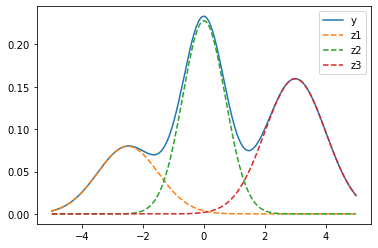

In [31]:
xnum = np.linspace(-5,5,2000) # 从0到1，等分50分
high = mixnormal(xnum,Theta)
z1 = weight[0]*normal(xnum,Theta[1:,0])
z2 = weight[1]*normal(xnum,Theta[1:,1])
z3 = weight[2]*normal(xnum,Theta[1:,2])
plt.figure() # 定义一个图像窗口
plt.plot(xnum,high) # 绘制曲线 y
plt.plot(xnum,z1,linestyle='--')
plt.plot(xnum,z2,linestyle='--')
plt.plot(xnum,z3,linestyle='--')
plt.legend(['y','z1','z2','z3',])
plt.show()

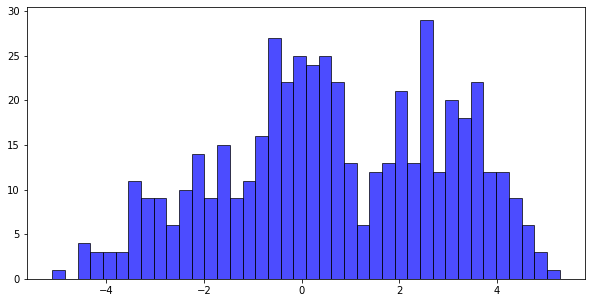

In [35]:
data0=data[:,0]

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot()
ax1.hist(data0, bins=40,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()